### Data Dictionary

The brca dataset from the dslabs package contains information about breast cancer diagnosis biopsy samples for tumors that were determined to be either benign (not cancer) and malignant (cancer).

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.1)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

#from pycaret.classification import *
#from pycaret.clustering import *
#from pycaret.regression import *


pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("brca.csv")

In [3]:
df

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,x.texture_se,x.perimeter_se,x.area_se,x.smoothness_se,x.compactness_se,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.fractal_dim_se,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,0.06879,0.9622,1.0260,8.758,118.800,0.006399,0.043100,0.07845,0.026240,0.02057,0.006213,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,M
565,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,0.05623,1.1760,1.2560,7.673,158.700,0.010300,0.028910,0.05198,0.024540,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,M
566,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,0.05533,0.7655,2.4630,5.203,99.040,0.005769,0.024230,0.03950,0.016780,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,M
567,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,0.05648,0.4564,1.0750,3.425,48.550,0.005903,0.037310,0.04730,0.015570,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x.radius_mean        569 non-null    float64
 1   x.texture_mean       569 non-null    float64
 2   x.perimeter_mean     569 non-null    float64
 3   x.area_mean          569 non-null    float64
 4   x.smoothness_mean    569 non-null    float64
 5   x.compactness_mean   569 non-null    float64
 6   x.concavity_mean     569 non-null    float64
 7   x.concave_pts_mean   569 non-null    float64
 8   x.symmetry_mean      569 non-null    float64
 9   x.fractal_dim_mean   569 non-null    float64
 10  x.radius_se          569 non-null    float64
 11  x.texture_se         569 non-null    float64
 12  x.perimeter_se       569 non-null    float64
 13  x.area_se            569 non-null    float64
 14  x.smoothness_se      569 non-null    float64
 15  x.compactness_se     569 non-null    flo

In [5]:
df.describe(include='all')

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,x.texture_se,x.perimeter_se,x.area_se,x.smoothness_se,x.compactness_se,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.fractal_dim_se,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,357
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [6]:
df.shape

(569, 31)

In [7]:
df.columns

Index(['x.radius_mean', 'x.texture_mean', 'x.perimeter_mean', 'x.area_mean',
       'x.smoothness_mean', 'x.compactness_mean', 'x.concavity_mean',
       'x.concave_pts_mean', 'x.symmetry_mean', 'x.fractal_dim_mean',
       'x.radius_se', 'x.texture_se', 'x.perimeter_se', 'x.area_se',
       'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst', 'y'],
      dtype='object')

In [8]:
# Q1a - how many samples and predictors

# 569 rows × 31 columns

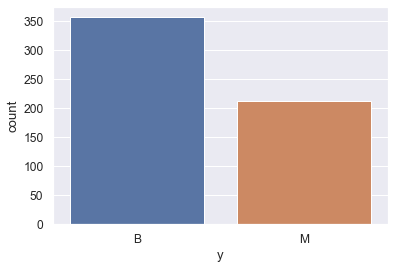

In [9]:
# Q1b - proportion of malignant samples
sns.countplot(x='y', data=df);

In [10]:
# Q1c - which column number has the highest mean
df.mean()

x.radius_mean           14.127292
x.texture_mean          19.289649
x.perimeter_mean        91.969033
x.area_mean            654.889104
x.smoothness_mean        0.096360
x.compactness_mean       0.104341
x.concavity_mean         0.088799
x.concave_pts_mean       0.048919
x.symmetry_mean          0.181162
x.fractal_dim_mean       0.062798
x.radius_se              0.405172
x.texture_se             1.216853
x.perimeter_se           2.866059
x.area_se               40.337079
x.smoothness_se          0.007041
x.compactness_se         0.025478
x.concavity_se           0.031894
x.concave_pts_se         0.011796
x.symmetry_se            0.020542
x.fractal_dim_se         0.003795
x.radius_worst          16.269190
x.texture_worst         25.677223
x.perimeter_worst      107.261213
x.area_worst           880.583128
x.smoothness_worst       0.132369
x.compactness_worst      0.254265
x.concavity_worst        0.272188
x.concave_pts_worst      0.114606
x.symmetry_worst         0.290076
x.fractal_dim_

In [11]:
# Q1d - which column number has the lowest sd
df.std()

x.radius_mean            3.524049
x.texture_mean           4.301036
x.perimeter_mean        24.298981
x.area_mean            351.914129
x.smoothness_mean        0.014064
x.compactness_mean       0.052813
x.concavity_mean         0.079720
x.concave_pts_mean       0.038803
x.symmetry_mean          0.027414
x.fractal_dim_mean       0.007060
x.radius_se              0.277313
x.texture_se             0.551648
x.perimeter_se           2.021855
x.area_se               45.491006
x.smoothness_se          0.003003
x.compactness_se         0.017908
x.concavity_se           0.030186
x.concave_pts_se         0.006170
x.symmetry_se            0.008266
x.fractal_dim_se         0.002646
x.radius_worst           4.833242
x.texture_worst          6.146258
x.perimeter_worst       33.602542
x.area_worst           569.356993
x.smoothness_worst       0.022832
x.compactness_worst      0.157336
x.concavity_worst        0.208624
x.concave_pts_worst      0.065732
x.symmetry_worst         0.061867
x.fractal_dim_

In [12]:
# q2 - sweep twice to scale each column
scaler = StandardScaler()

In [13]:
X = df.iloc[:,0:30]
y = df.iloc[:,30]

In [14]:
X

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,x.texture_se,x.perimeter_se,x.area_se,x.smoothness_se,x.compactness_se,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.fractal_dim_se,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,0.06879,0.9622,1.0260,8.758,118.800,0.006399,0.043100,0.07845,0.026240,0.02057,0.006213,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
565,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,0.05623,1.1760,1.2560,7.673,158.700,0.010300,0.028910,0.05198,0.024540,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
566,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,0.05533,0.7655,2.4630,5.203,99.040,0.005769,0.024230,0.03950,0.016780,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
567,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,0.05648,0.4564,1.0750,3.425,48.550,0.005903,0.037310,0.04730,0.015570,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [15]:
df_scaled = scaler.fit_transform(X)

In [16]:
df_scaled

array([[-0.16679919, -1.1471623 , -0.18572799, ...,  0.21612292,
         0.12334653, -0.62929189],
       [-0.29744572, -0.83300824, -0.26110605, ..., -0.63610973,
         0.45822712, -0.11724974],
       [-1.31308049, -1.59395919, -1.30280622, ..., -0.7969026 ,
        -0.72922385, -0.34445459],
       ...,
       [ 1.70485436,  2.08513394,  1.61593137, ...,  0.73382724,
        -0.53185462, -0.97397828],
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528]])

In [17]:
df_scaled_dataframe = pd.DataFrame(data=df_scaled,columns=X.columns)

In [18]:
df_scaled_dataframe

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,x.texture_se,x.perimeter_se,x.area_se,x.smoothness_se,x.compactness_se,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.fractal_dim_se,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
0,-0.166799,-1.147162,-0.185728,-0.251957,0.101747,-0.436850,-0.278210,-0.028609,0.267911,-0.728310,-0.488225,-0.776999,-0.400014,-0.369124,0.473693,-0.607974,-0.266043,0.219610,-0.089876,-0.565449,-0.240048,-1.045005,-0.225217,-0.297761,0.509873,-0.489605,-0.159223,0.216123,0.123347,-0.629292
1,-0.297446,-0.833008,-0.261106,-0.383638,0.792763,0.429422,-0.541362,-0.459627,0.567289,0.753087,-0.793925,-0.851206,-0.734160,-0.564720,-0.981366,-0.363178,-0.494494,-0.860707,-0.455534,-0.518168,-0.366368,-0.844707,-0.332744,-0.439624,-0.051226,0.148443,-0.399099,-0.636110,0.458227,-0.117250
2,-1.313080,-1.593959,-1.302806,-1.083572,0.429819,-0.747086,-0.743748,-0.726337,0.012345,0.886341,-0.461517,-0.435539,-0.473774,-0.542058,0.855042,-0.623623,-0.399334,0.391552,-0.032970,-0.312777,-1.250611,-1.631243,-1.254913,-0.994422,0.001377,-0.887193,-0.880434,-0.796903,-0.729224,-0.344455
3,-0.311646,-0.202373,-0.385500,-0.372831,-0.464730,-1.263703,-0.793214,-0.507861,-1.258183,-0.590802,-0.798617,2.041403,-0.839601,-0.575940,-0.896363,-1.150159,-0.612202,-0.025327,0.746776,-0.763275,-0.614867,-0.466909,-0.679153,-0.588344,-1.549975,-1.323648,-1.073966,-0.981753,-1.478256,-1.233324
4,-1.684571,-0.570050,-1.658278,-1.288347,-0.737294,-0.851130,-0.915500,-1.109197,-0.155598,0.316465,-0.898232,-0.472008,-0.877224,-0.706961,0.642366,-0.504020,-0.530967,-0.953653,0.629330,-0.458783,-1.512777,-0.605327,-1.489328,-1.122222,-0.116980,-0.754239,-0.975761,-1.354653,0.330422,-0.546168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.929226,1.349781,2.101976,1.968434,0.963560,2.260135,2.870075,2.540213,1.231760,0.849484,2.010431,-0.346274,2.916691,1.726318,-0.214002,0.984878,1.543668,2.342934,0.003354,0.914648,1.660970,0.607860,2.139779,1.649655,0.365215,1.045400,1.860055,2.125538,0.045693,0.819278
565,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
566,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
567,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409


In [19]:
# q2a - what is the sd of the first column
# q2b - what is the median of the first column
df_scaled_dataframe['x.radius_mean'].describe()

count    5.690000e+02
mean    -2.489709e-16
std      1.000880e+00
min     -2.029648e+00
25%     -6.893853e-01
50%     -2.150816e-01
75%      4.693926e-01
max      3.971288e+00
Name: x.radius_mean, dtype: float64

In [20]:
# q3 - calculate the distance between all samples using the scaled matrix
# q3a - what is the average distance between the first sample and benign samples
# q3b - what is the average distance between the first sample and malignant samples

In [21]:
# q4 - make a heatmap of the relationship between features using the scaled matrix

### Univariate Data Exploration

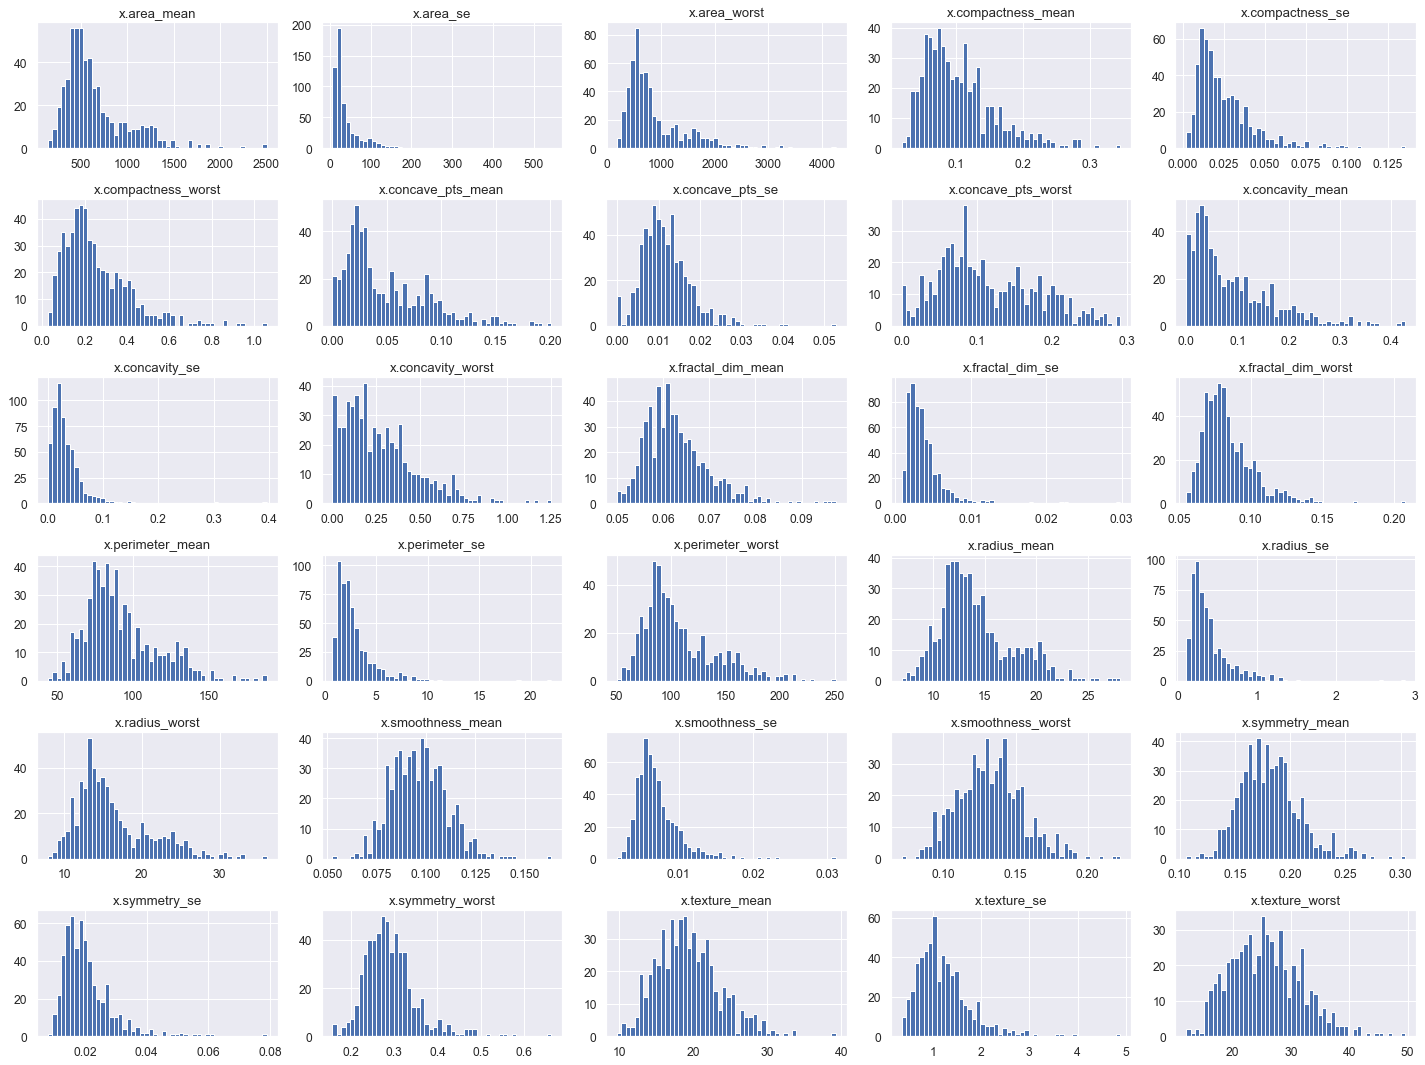

In [22]:
df.hist(bins=50, figsize=(20,15));
plt.tight_layout()
plt.show()

In [23]:
df_scaled_dataframe.corr()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,x.texture_se,x.perimeter_se,x.area_se,x.smoothness_se,x.compactness_se,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.fractal_dim_se,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
x.radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
x.texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
x.perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
x.area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
x.smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
x.compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
x.concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
x.concave_pts_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
x.symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
x.fractal_dim_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


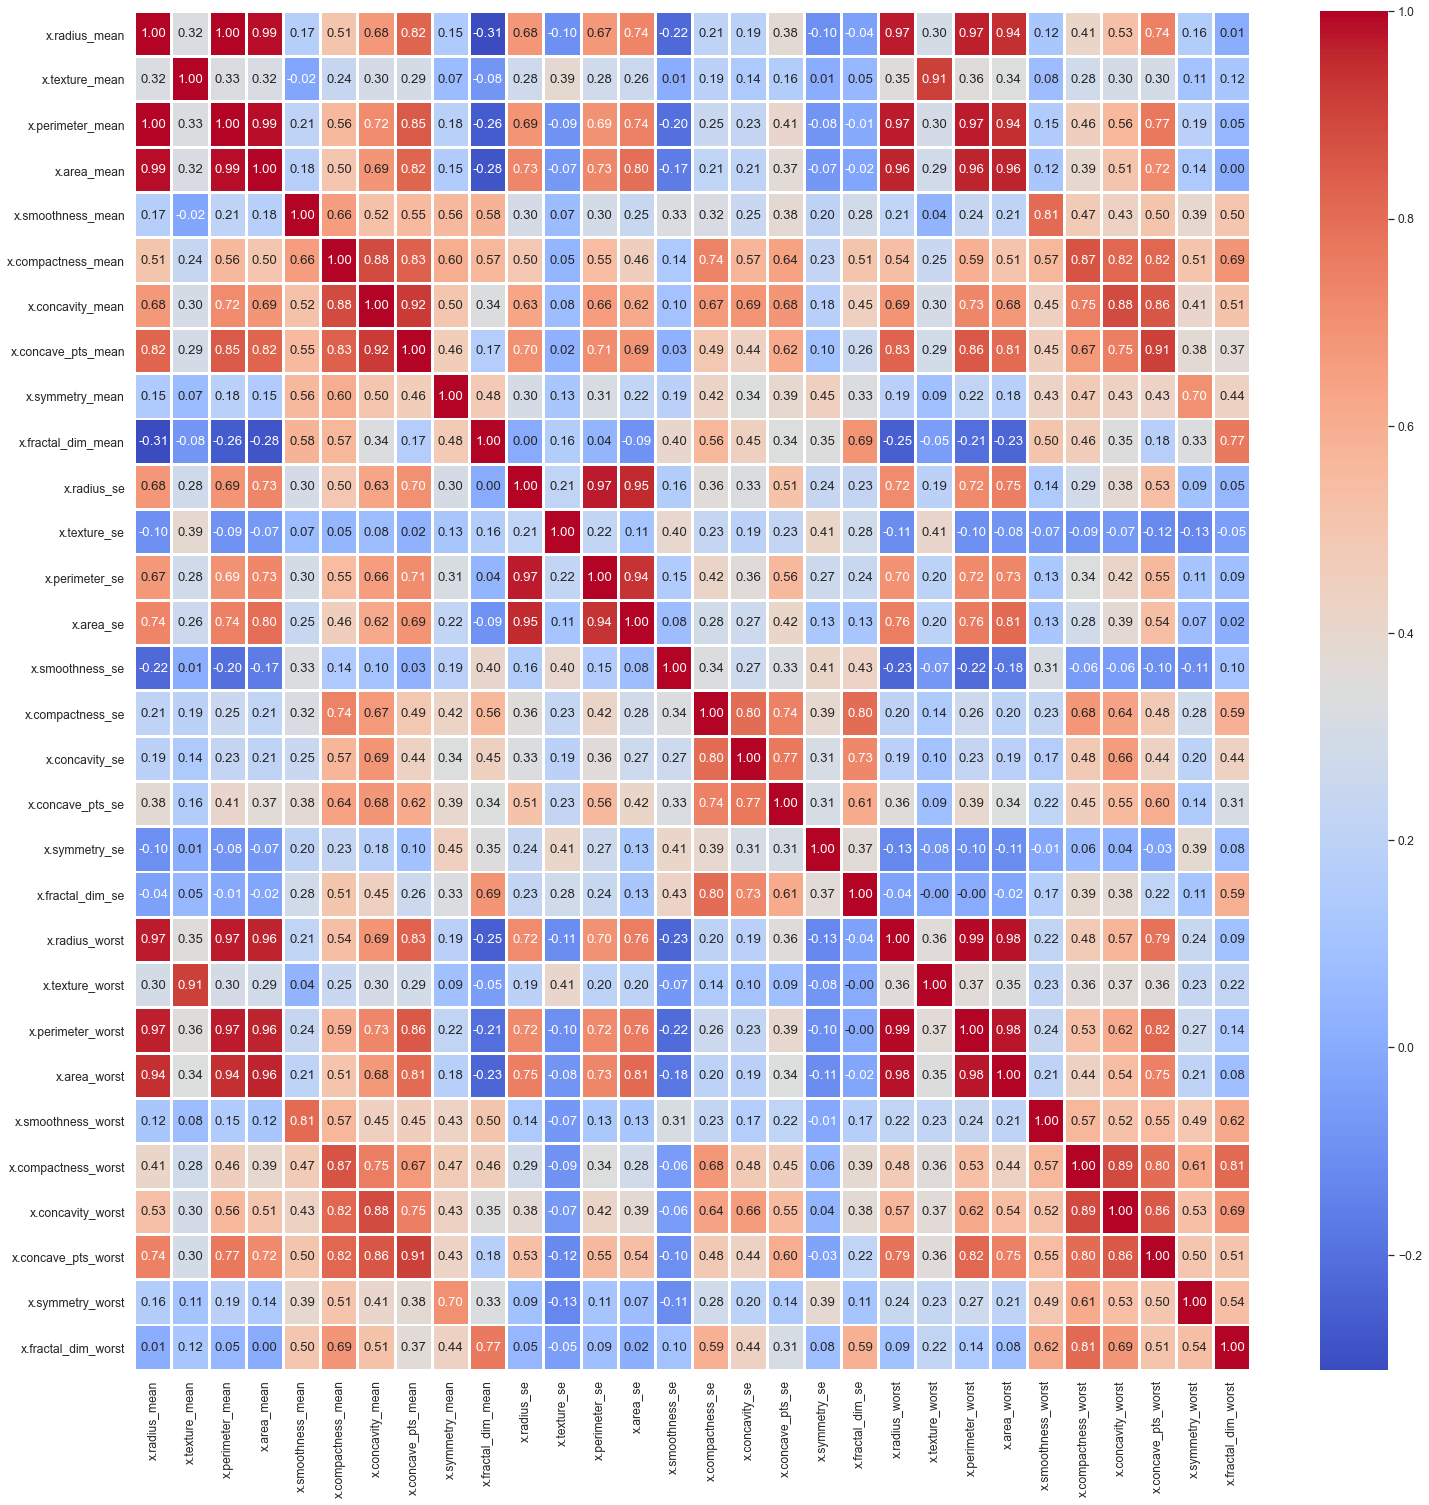

In [24]:
plt.figure(figsize=(25,25))
sns.heatmap(df_scaled_dataframe.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

In [25]:
# q5 - perform heirarchical clustering, cut the tree into 5
# q5a - which predictor is in its own group

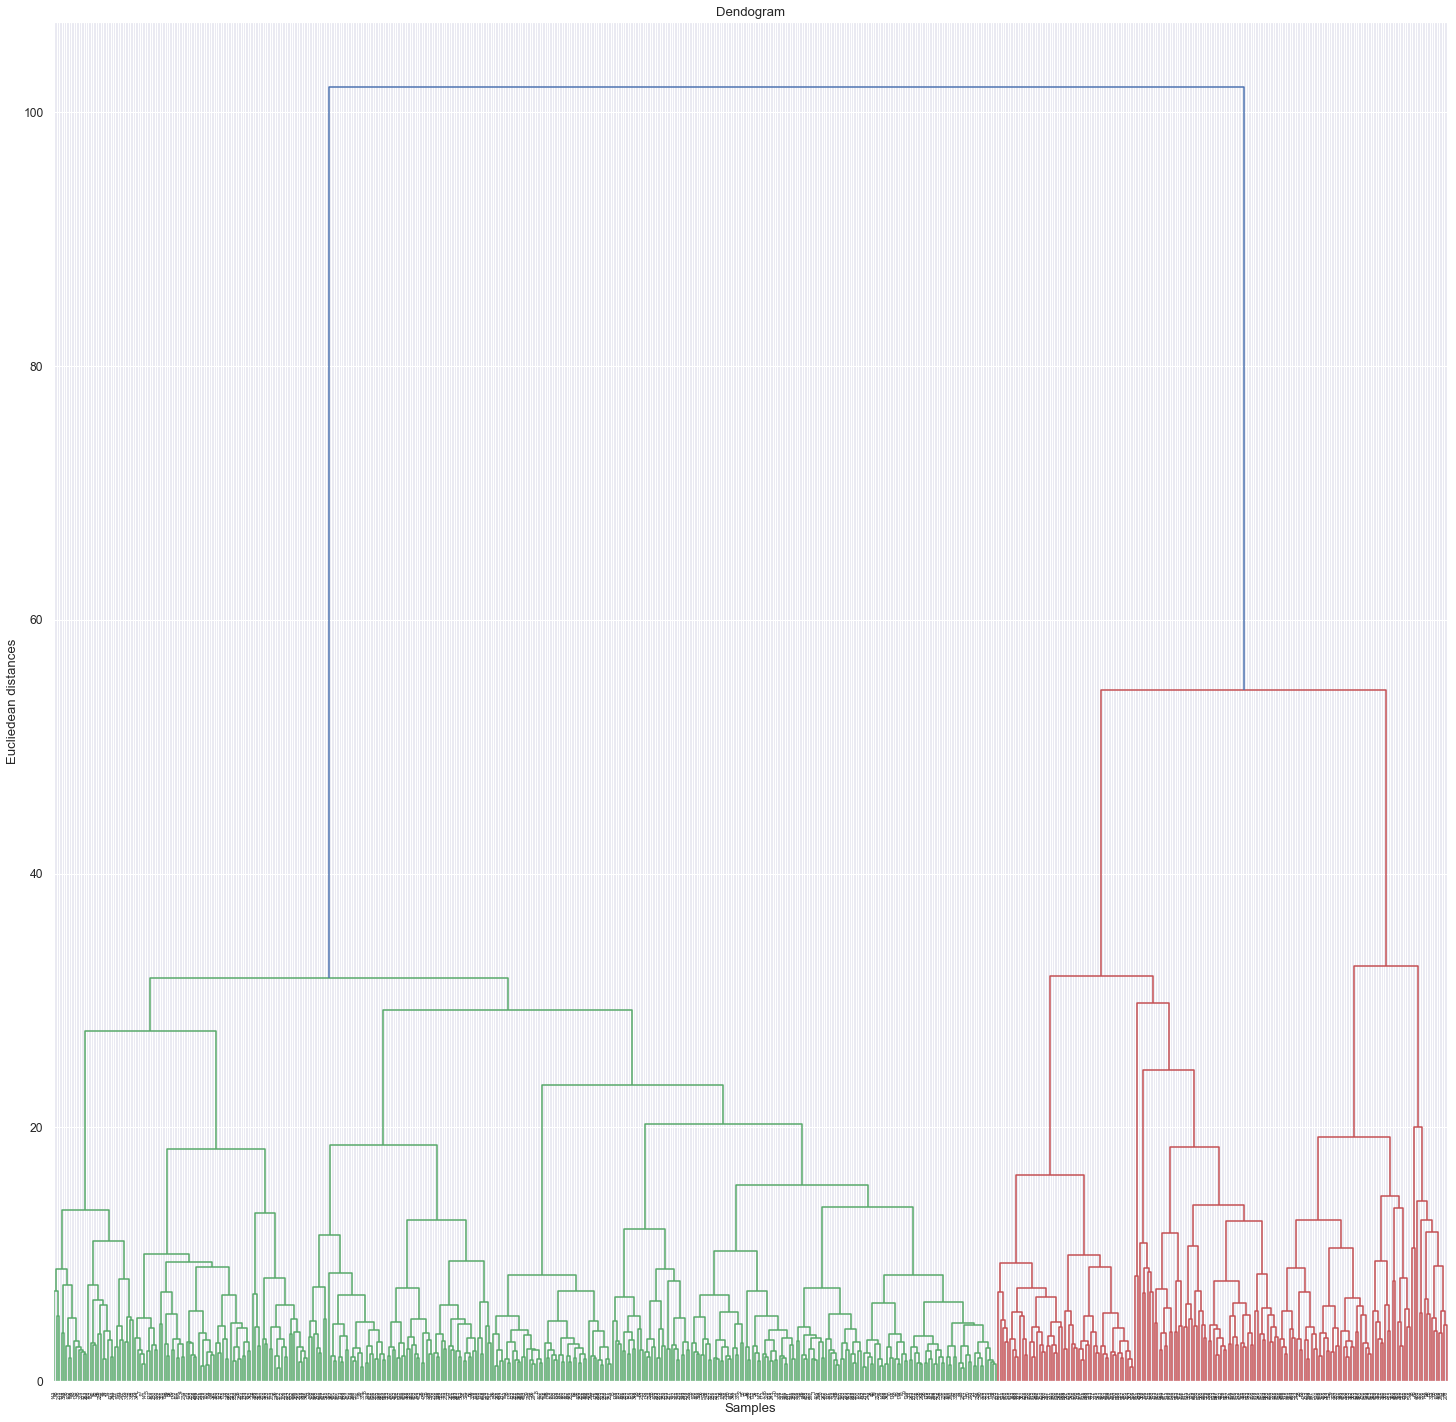

In [26]:
plt.figure(figsize=(25,25))
dendogram = sch.dendrogram(sch.linkage(df_scaled_dataframe,method='ward'),truncate_mode='level',color_threshold=None)
plt.title("Dendogram")
plt.xlabel("Samples")
plt.ylabel("Eucliedean distances")
plt.show()

In [27]:
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [28]:
# q6 - perform principal component analysis
# q6a - what proportion of variance is explained by the first component
# q6b - how many PCs required to explain 90%
pca = PCA(n_components=2)

In [29]:
principal_comp = pca.fit_transform(df_scaled_dataframe)
principal_comp

array([[-1.23706336, -0.18821495],
       [-1.57816123,  0.57280819],
       [-3.55733637,  1.6629499 ],
       ...,
       [ 3.79338237, -3.58404786],
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011]])

In [30]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.237063,-0.188215
1,-1.578161,0.572808
2,-3.557336,1.662950
3,-3.749313,-1.413473
4,-4.581937,1.484220


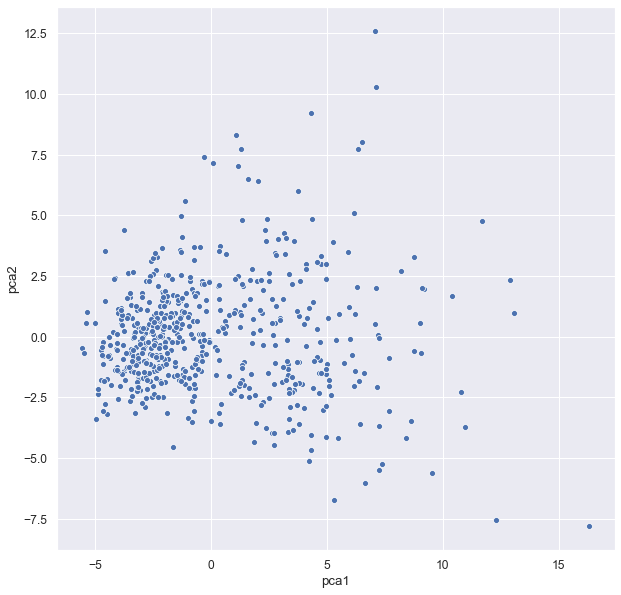

In [31]:
# q7 - plot the first two PCs, with color representing tumor
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", data = pca_df)
plt.show();

In [32]:
# q8 - make a boxplot of the first 10 pcs, grouped by tumor type
# q8a - which PCs dont overlap IQRs for tumor type

In [33]:
df.head(10)

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,x.texture_se,x.perimeter_se,x.area_se,x.smoothness_se,x.compactness_se,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.fractal_dim_se,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B
5,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.027490,0.1675,0.06043,0.2636,0.7294,1.848,19.870,0.005488,0.014270,0.02322,0.005660,0.01428,0.002422,13.760,20.70,89.88,582.6,0.14940,0.21560,0.30500,0.06548,0.2747,0.08301,B
6,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.033840,0.1809,0.05718,0.2338,1.3530,1.735,20.200,0.004455,0.013820,0.02095,0.011840,0.01641,0.001956,15.150,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917,B
7,11.760,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.011150,0.1495,0.05888,0.4062,1.2100,2.635,28.470,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.980,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563,B
8,13.640,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.017230,0.1353,0.05953,0.1872,0.9234,1.449,14.550,0.004477,0.011770,0.01079,0.007956,0.01325,0.002551,14.670,23.19,96.08,656.7,0.10890,0.15820,0.10500,0.08586,0.2346,0.08025,B
9,11.940,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.013490,0.1868,0.06110,0.2273,0.6329,1.520,17.470,0.007210,0.008380,0.01311,0.008000,0.01996,0.002635,13.100,21.33,83.67,527.2,0.11440,0.08906,0.09203,0.06296,0.2785,0.07408,B


In [34]:
df.groupby(by='y').count()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,x.texture_se,x.perimeter_se,x.area_se,x.smoothness_se,x.compactness_se,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.fractal_dim_se,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212


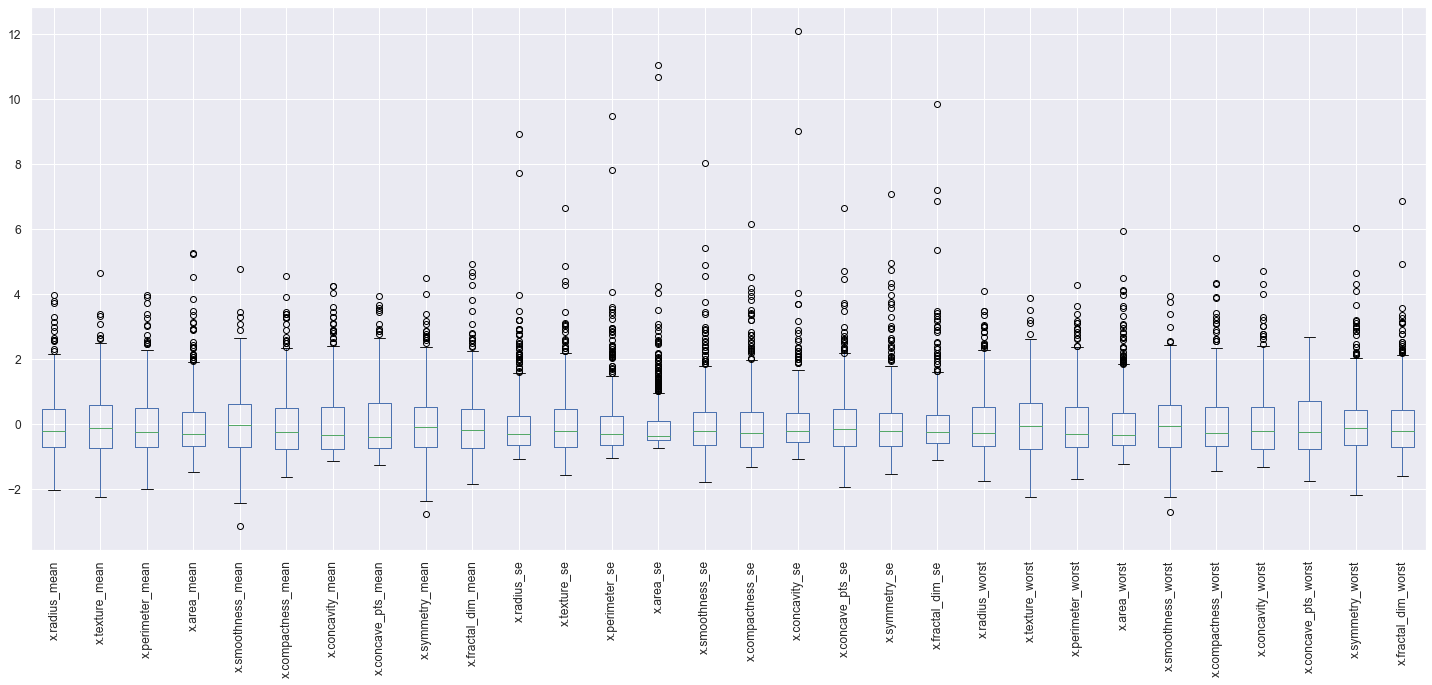

In [35]:
df_scaled_dataframe.plot(kind = 'box', figsize=(25,10), rot=90);
plt.show()

### Model Training

### Using PyCaret

In [36]:
df

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,x.texture_se,x.perimeter_se,x.area_se,x.smoothness_se,x.compactness_se,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.fractal_dim_se,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,0.06879,0.9622,1.0260,8.758,118.800,0.006399,0.043100,0.07845,0.026240,0.02057,0.006213,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,M
565,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,0.05623,1.1760,1.2560,7.673,158.700,0.010300,0.028910,0.05198,0.024540,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,M
566,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,0.05533,0.7655,2.4630,5.203,99.040,0.005769,0.024230,0.03950,0.016780,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,M
567,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,0.05648,0.4564,1.0750,3.425,48.550,0.005903,0.037310,0.04730,0.015570,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,M


In [37]:
# q9 - check the proportions of the train and test sets
# q9a - what is the proportion of benign in the train set
# q9b - what is the proportion of benign in the test set

In [38]:
from pycaret.clustering import *

In [39]:
expclus = setup(data = df, session_id=123, normalize=True) 


Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Original Data,"(569, 31)"
2,Missing Values,False
3,Numeric Features,30
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(569, 32)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [40]:
# q10 - the predict_kmeans() takes two arguments, the matrix and k-means object
# q10a - perform k-means on the train set and predict the overall accuracy

In [41]:
kmeans = create_model('kmeans',num_clusters=5)

In [42]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)


In [43]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y,Cluster
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B,Cluster 1
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B,Cluster 1
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B,Cluster 1
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B,Cluster 3
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B,Cluster 1


In [44]:
plot_model(kmeans)

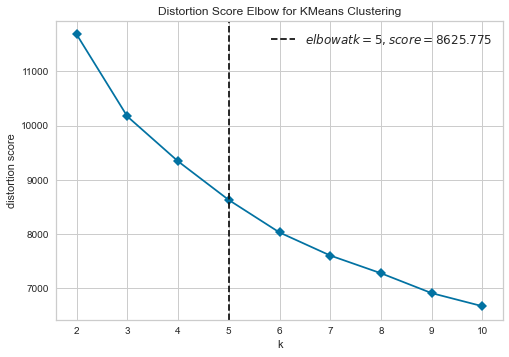

In [45]:
plot_model(kmeans, plot = 'elbow')

In [46]:
plot_model(kmeans, plot = 'distribution') #to see size of clusters

In [47]:
#Q11-13 Logistic Regression Model

In [48]:
from pycaret.classification import *

In [49]:
expclass = setup(data=df, target='y', train_size=0.8, normalize=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1366
1,Target Type,Binary
2,Label Encoded,"B: 0, M: 1"
3,Original Data,"(569, 31)"
4,Missing Values,False
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [50]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.978100,0.995400,0.964700,0.978000,0.970400,0.953000
1,Light Gradient Boosting Machine,0.978100,0.992000,0.958800,0.983300,0.969600,0.952500
2,CatBoost Classifier,0.978100,0.993600,0.958800,0.983000,0.969800,0.952600
3,Logistic Regression,0.973600,0.993900,0.958800,0.971600,0.964300,0.943400
4,Random Forest Classifier,0.971400,0.992000,0.941200,0.981500,0.960000,0.937900
5,K Neighbors Classifier,0.967100,0.986900,0.923500,0.987100,0.952800,0.927700
6,Gradient Boosting Classifier,0.967100,0.990600,0.952900,0.962000,0.955700,0.929500
7,Extreme Gradient Boosting,0.967000,0.990700,0.952900,0.961700,0.955700,0.929400
8,SVM - Linear Kernel,0.962700,0.000000,0.947100,0.953900,0.949700,0.920000
9,Ada Boost Classifier,0.960500,0.989900,0.935300,0.960300,0.945900,0.914900


In [51]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9348,0.9615,0.9412,0.8889,0.9143,0.8617
3,0.9565,0.9919,0.8824,1.0000,0.9375,0.9044
4,0.9783,1.0000,1.0000,0.9444,0.9714,0.9539
5,0.9556,0.9937,0.9412,0.9412,0.9412,0.9055
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9556,0.9958,0.9412,0.9412,0.9412,0.9055
8,0.9556,0.9958,0.8824,1.0000,0.9375,0.9032
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [52]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1366, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [53]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [54]:
# KNN Model

In [55]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9348,0.9604,0.8824,0.9375,0.9091,0.8583
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9565,0.9645,0.8824,1.0000,0.9375,0.9044
3,0.9130,0.9899,0.7647,1.0000,0.8667,0.8038
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9778,0.9989,0.9412,1.0000,0.9697,0.9522
8,0.9111,0.9853,0.8235,0.9333,0.8750,0.8065
9,0.9778,0.9695,0.9412,1.0000,0.9697,0.9522


In [56]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [57]:
evaluate_model(knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [58]:
# Random Forest Model

In [59]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9565,0.9939,0.8824,1.0000,0.9375,0.9044
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9348,0.9909,0.8824,0.9375,0.9091,0.8583
3,0.9565,1.0000,0.8824,1.0000,0.9375,0.9044
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9778,0.9958,1.0000,0.9444,0.9714,0.9533
7,0.9111,0.9779,0.8235,0.9333,0.8750,0.8065
8,0.9778,0.9611,0.9412,1.0000,0.9697,0.9522
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [60]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1366,
                       verbose=0, warm_start=False)


In [61]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [62]:
# Ensemble

In [63]:
ensemble = create_model('et', ensemble=True, method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9565,1.0000,0.8824,1.0000,0.9375,0.9044
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9565,0.9716,0.9412,0.9412,0.9412,0.9067
3,0.9565,1.0000,0.8824,1.0000,0.9375,0.9044
4,0.9783,1.0000,1.0000,0.9444,0.9714,0.9539
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9778,0.9937,1.0000,0.9444,0.9714,0.9533
8,0.9778,0.9937,0.9412,1.0000,0.9697,0.9522
9,0.9778,1.0000,0.9412,1.0000,0.9697,0.9522


In [64]:
print(ensemble)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=ExtraTreesClassifier(bootstrap=False,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_wei

In [65]:
evaluate_model(ensemble)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [66]:
predict_model(ensemble)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ada Boost Classifier,0.9211,0.9853,0.881,0.9024,0.8916,0.8295


,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,...,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y,Label,Score
0,0.393356,-1.536767,-1.231750,1.988342,-0.278795,-0.738224,-1.022993,0.059807,0.676536,-0.169532,...,-1.066496,1.382207,-0.537316,-0.874006,-1.322068,0.115258,-0.378258,0,0,0.01
1,1.217138,0.915698,0.780737,0.764297,1.490705,1.009428,0.787254,0.421251,0.293783,0.669609,...,1.407063,1.145493,3.086136,1.844223,1.146468,0.666921,2.768252,1,1,1.00
2,0.740089,-0.422160,-0.422603,-0.413491,-0.885621,-0.523408,-0.564350,-0.827372,-0.304446,-0.608051,...,-0.399017,0.417818,-0.648640,-0.261410,-0.324269,-0.116085,-0.181532,1,0,0.02
3,1.375378,0.147089,0.124887,-0.177222,-1.005016,-0.813805,-0.514052,-0.900391,-1.099722,2.919230,...,-0.319559,-1.687620,-1.291078,-1.190786,-1.303644,-2.160960,-1.601839,1,0,0.40
4,-0.113944,0.713866,0.658156,-0.548706,-0.237291,-0.057493,0.434393,0.297119,-1.057194,0.699566,...,0.666982,-0.682463,-0.269501,-0.193765,0.499338,-0.146823,-0.646471,1,1,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-0.432753,-0.322891,-0.322206,-1.722935,-1.120051,-0.570489,-0.976796,-1.185164,-0.914016,-0.874050,...,-0.489725,-0.976164,-0.658182,-0.203360,-0.988301,-0.216387,-0.663096,0,0,0.01
110,-1.410121,0.932174,0.959062,-1.279575,-0.799203,-0.556804,-0.184147,-2.159966,-1.469717,0.282341,...,0.579086,-1.479400,-0.982868,-0.803050,-0.475012,-1.808284,-1.398463,0,1,0.66
111,1.063551,1.760097,1.684024,0.828346,1.505866,1.751427,2.039810,1.596855,1.685870,2.406722,...,1.433432,0.102199,0.539669,1.060308,1.183012,0.636183,0.595398,1,1,1.00
112,-1.093640,-0.740560,-0.710995,0.586383,-0.418088,-0.448455,-0.753936,-0.119089,0.417114,-0.728238,...,-0.725988,0.124117,-0.338840,-0.060394,-0.613574,0.065106,0.435246,0,0,0.00
